![Mind-Body-Synch-Coach-Header](header.png)

## Project Overview

**Objective**: In the current wearable technology market, users are flooded with objective health metrics (e.g., "You slept 8 hours"), yet many suffer from "Orthosomnia"—the anxiety or disconnect between their tracked data and how they actually feel.

This project aims to solve this business problem by developing a **"Cognitive Sleep Coach"**. By analyzing the gap between **Objective Recovery** (Fitbit data) and **Subjective Fatigue** (Survey data), we will propose a solution that provides personalized cognitive reframing to improve user retention and daily vitality.

## Problem Statement: The "Orthosomnia" Paradox

- **Context**: Wearable devices provide accurate sleep architecture data, yet many users suffer from "Paradoxical Insomnia" or "Orthosomnia"—feeling tired despite good data, or obsessing over scores.

- **Pain Point**: Current health apps fail to explain why a user feels tired when their data looks "green." This leads to a loss of trust in the device and high churn rates.

- **Opportunity**: Leveraging the discrepancy between **Objective Metrics** (HRV, Sleep Efficiency, REM) and **Subjective Metrics** (Stress, Mood, Perceived Quality) to provide actionable psychological and physiological insights.

## Data Overview

<span style='background-color: rgba(138, 43, 226, 0.1); padding: 10px; display: block; border-left: 5px solid purple;'>This project leverages a **multi-modal dataset** that maps **Objective Biometric Data** (wearable) with **Subjective Self-Report Data** (survey) to analyze and resolve the "Sleep Perception Gap." The key data columns utilized are as follows:

**A. Objective Sleep Metrics (Wearable-based Ground Truth)**
Physiological data collected via wearable devices, serving as the "Ground Truth" for physical recovery.

- `main_sleep_efficiency` **(Sleep Efficiency)**: The ratio of total time asleep to total time in bed (%). A key indicator of sleep density.

- `main_sleep_minutes_asleep` **(Total Sleep Time)**: The actual duration of sleep in minutes.

- `main_sleep_rem_minutes` **/** `main_sleep_deep_minutes`: Duration of specific sleep stages responsible for mental (REM) and physical (Deep) recovery.

- `HRV` **(Heart Rate Variability)**: A physiological marker for stress recovery during sleep.

**B. Subjective Sleep Metrics (Survey-based Perception)**
"Feelings" reported by users every morning. These serve as the comparative baseline to calculate the "Gap" against objective metrics.

- `selfreport_sleep_quality` **(Subjective Sleep Quality)**: The user's perceived overall satisfaction with their sleep (Likert Scale).

- `selfreport_hours_slept`: The sleep duration as perceived by the user. By comparing this with main_sleep_minutes_asleep, we quantify **"Time Perception Distortion"**.

- `selfreport_SOL` **(Sleep Onset Latency)**: Subjective estimation of time taken to fall asleep.

**C. Target Variables (Morning Readiness & Mood)**
The final prediction targets (Y) representing the User Experience (UX) outcomes we aim to improve.

- `energy_morning`: The primary target variable (Y). We aim to predict and improve this score.

- `stress_morning` : Used to analyze the downstream effects of the perception gap.

##??? IS THIS PART BELOW NOT USED??
**D. Contextual Features (Lifestyle Factors)**
External factors influencing sleep quality and perception, used for **Root Cause Analysis**.

- `sedentary_minutes`: Total daily sedentary time. Used to analyze the impact of physical inactivity on sleep depth (Deep Sleep) and sleep onset.

- `steps` **/** `vigorousPA_min_in_range`: General activity levels and high-intensity exercise markers.

## 1. Environment Setup

In [29]:
# Import Libraries
import pandas as pd
import numpy as np
import plotly.express as px         # need to do [python3 -m pip install plotly] before launching python
import matplotlib.pyplot as plt     # need to do [python3 -m pip install matplotlib]
import seaborn as sns               # need to do [python3 -m pip install seaborn]
import scipy.stats as stats                  # need to do [python3 -m pip install scipy]

# Set plot style
sns.set(style="whitegrid")

## 2. Loading Student Data

In [5]:
### Import Student Fitbit data
df = pd.read_csv('/Users/kk/Desktop/Project/MBSC/UTX_student.csv')
df.head(3)

,participantID1,participantID2,pre_or_post,date_of_activity,HRV,MVPA_min_in_range,lightPA_min_in_range,lightPA_grps,lightPA_grps2_30min,main_sleep_nrem_minutes,...,Zmain_sleep_light_minutes,Zmain_sleep_rem_minutes,Znap_minutes_asleep,Zselfreport_hours_slept,Zselfreport_SOL,Zselfreport_NAW,Zselfreport_sleep_quality,main_sleep_nrem_minutes.1,Zmain_sleep_nrem_minutes,ZTotalPA
0,76,z7trat1j,1,13-Feb-20,13.94,10.00,16.00,1.0,1.0,139.0,...,-2.64,-1.32,NaN,-1.68,0.70,-0.54,-1.04,139.0,-2.19701,-0.92012
1,13,6z6k8qzx,1,23-Jan-20,10.60,2.00,11.00,1.0,1.0,141.0,...,-2.05,-1.33,NaN,-1.80,2.20,-1.07,-2.35,141.0,-2.17188,-1.02262
2,54,4i7679py,2,21-Jul-20,12.33,4.25,18.18,1.0,1.0,149.0,...,-1.01,-1.62,NaN,-0.77,-0.72,1.26,-1.90,149.0,-0.98442,-0.45185


In [4]:
# Filter for necessary columns and handle missing values
cols_to_keep = ['participantID1', 'date_of_activity', 'main_sleep_efficiency', 
                'main_sleep_minutes_asleep', 'main_sleep_rem_minutes', 'HRV', 
                'selfreport_sleep_quality', 'energy_morning', 'stress_evening']
df_clean = df[cols_to_keep].dropna()

# Convert date to datetime
df_clean['date_of_activity'] = pd.to_datetime(df_clean['date_of_activity'])

df_clean.head()

/var/folders/5j/69_j16qs7yb6c8mrb33p0lx00000gn/T/ipykernel_58380/2234824595.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['date_of_activity'] = pd.to_datetime(df_clean['date_of_activity'])


,participantID1,date_of_activity,main_sleep_efficiency,main_sleep_minutes_asleep,main_sleep_rem_minutes,HRV,selfreport_sleep_quality,energy_morning,stress_evening
10,40,2020-05-31,94.0,207,36.0,18.31,2.0,2.0,1.0
12,76,2020-02-02,92.0,234,56.0,11.94,2.0,3.0,1.0
13,45,2020-01-26,89.0,229,49.0,10.95,2.0,2.0,1.0
17,66,2020-08-02,92.0,233,45.0,7.75,1.0,2.0,3.0
24,13,2020-03-01,86.0,206,12.0,10.49,1.0,2.0,1.0


## 3. Visualizing the "Mood vs. Metrics" Paradox
<span style='background-color: rgba(138, 43, 226, 0.1); padding: 10px; display: block; border-left: 5px solid purple;'>**Markdown**: We will compare which factor correlates more strongly with `energy_morning`: the machine's data or the user's feeling.

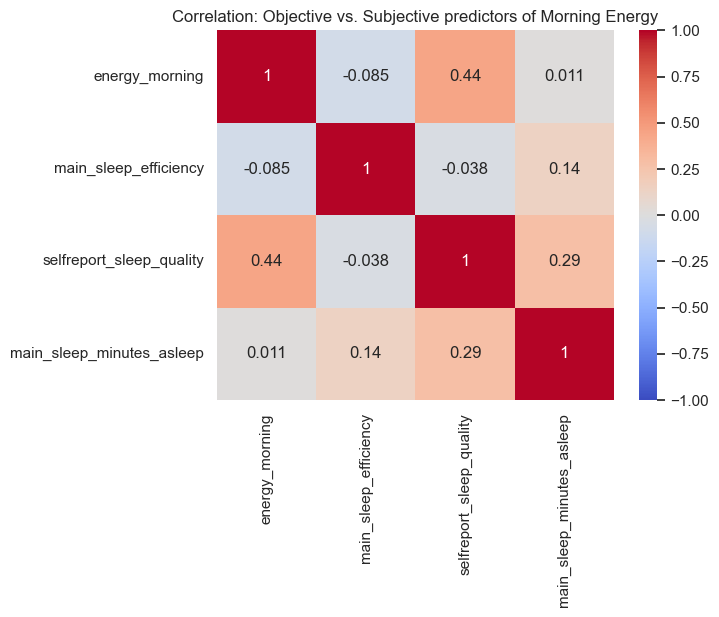

In [9]:
# Correlation Heatmap
corr_matrix = df_clean[['energy_morning', 'main_sleep_efficiency', 'selfreport_sleep_quality', 'main_sleep_minutes_asleep']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation: Objective vs. Subjective predictors of Morning Energy')
plt.show()

**Markdown**: <span style='background-color: rgba(138, 43, 226, 0.1); padding: 10px; display: block; border-left: 5px solid purple;'> Strategic Insight (Interpretation): 

According to the heatmap, `energy_morning` has a relatively strong correlation (0.44) with `selfreport_sleep_quality` (Subjective), but a very weak correlation (-0.085) with `main_sleep_efficiency` (Objective).



This confirms our hypothesis: **How users "feel" they slept matters more for their daily performance than what the Fitbit says.** To improve user wellness, we must bridge this gap.

## 4. Establishing Baselines

In [10]:
# Calculate average metrics to understand the "Average Student"
print(f"Avg Sleep Efficiency: {df_clean['main_sleep_efficiency'].mean():.2f}%")
print(f"Avg Perceived Quality: {df_clean['selfreport_sleep_quality'].mean():.2f}/5")
print(f"Avg Morning Energy: {df_clean['energy_morning'].mean():.2f}/5")

Avg Sleep Efficiency: 92.09%
Avg Perceived Quality: 1.90/5
Avg Morning Energy: 1.88/5


# Part II: Strategic Insights & Findings

## 5. Quantifying the "Sleep Perception Gap"
<span style='background-color: rgba(138, 43, 226, 0.1); padding: 10px; display: block; border-left: 5px solid purple;'>**Markdown**: A. We need to identify specific instances where the user's perception divorced from reality. We will create a `Perception_Gap` metric using Z-scores.

**Gap < 0**: User felt worse than the data suggests (Psychological Fatigue / "Worried Well").

**Gap > 0**: User felt better than the data suggests (Physiological masking).

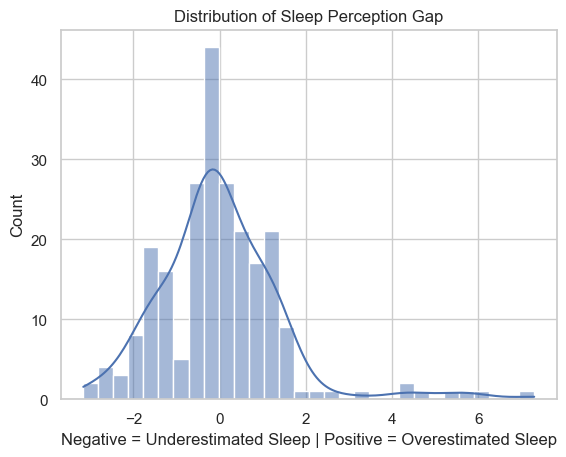

In [13]:
# Normalize the columns
df_clean['z_obj'] = stats.zscore(df_clean['main_sleep_efficiency'])
df_clean['z_subj'] = stats.zscore(df_clean['selfreport_sleep_quality'])

# Calculate Gap
df_clean['perception_gap'] = df_clean['z_subj'] - df_clean['z_obj']

# Visualize the Gap Distribution
sns.histplot(df_clean['perception_gap'], bins=30, kde=True)
plt.title('Distribution of Sleep Perception Gap')
plt.xlabel('Negative = Underestimated Sleep | Positive = Overestimated Sleep')
plt.show()

<span style='color:purple'>Strategic Insight: The Three Hidden Personas</span>

**Interpretation**: The histogram reveals that a significant portion of users suffer from a **"Perception Gap."**

- **Left Tail (Negative Gap):** Users who underestimate their recovery. They need **cognitive validation** to break the cycle of psychosomatic fatigue.

- **Right Tail (Positive Gap)**: Users who overestimate their readiness. They are at risk of burnout and require **behavioral nudges** to prioritize rest despite feeling energetic.

This proves that a **one-size-fits-all sleep score is insufficient**; personalization must be based on this gap.

## 6. Deep Dive: The Hidden Architecture (Root Cause Analysis)
**Markdown: B.** Why do people have a negative gap? Is it just "mood," or is there a hidden physiological reason? We will look at **REM Latency** and **REM Ratio** as suggested by the Zapalac et al. (2024) paper.

In [25]:
# 1. Create Sleep Architecture Features
df_clean['rem_ratio'] = df_clean['main_sleep_rem_minutes'] / df_clean['main_sleep_minutes_asleep']

# 2. Create a new column explicitly for 'Group Label'
plot_df = df_clean.copy()
plot_df['Group'] = 'Exclude' # Default label

## Label the 'Negative Gap' (Complaining) and 'Normal Gap' (Aligned) group
# Negative Gap: Users who felt terrible, even though Fitbit said they slept well (Gap < -1)
plot_df.loc[plot_df['perception_gap'] < -1, 'Group'] = 'Negative Gap'

# Normal Gap: Users whose subjective feeling aligned with the objective data (-0.5 ~ 0.5)
plot_df.loc[(plot_df['perception_gap'] > -0.5) & (plot_df['perception_gap'] < 0.5), 'Group'] = 'Normal Gap'

# 3. Filter only the two groups we want to compare
plot_df = plot_df[plot_df['Group'] != 'Exclude']

# Check counts again to be sure
print(plot_df['Group'].value_counts())

Group
Normal Gap      102
Negative Gap     52
Name: count, dtype: int64


/var/folders/5j/69_j16qs7yb6c8mrb33p0lx00000gn/T/ipykernel_58380/3682615338.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='Group', y='rem_ratio', palette="Set2", order=['Negative Gap', 'Normal Gap'])


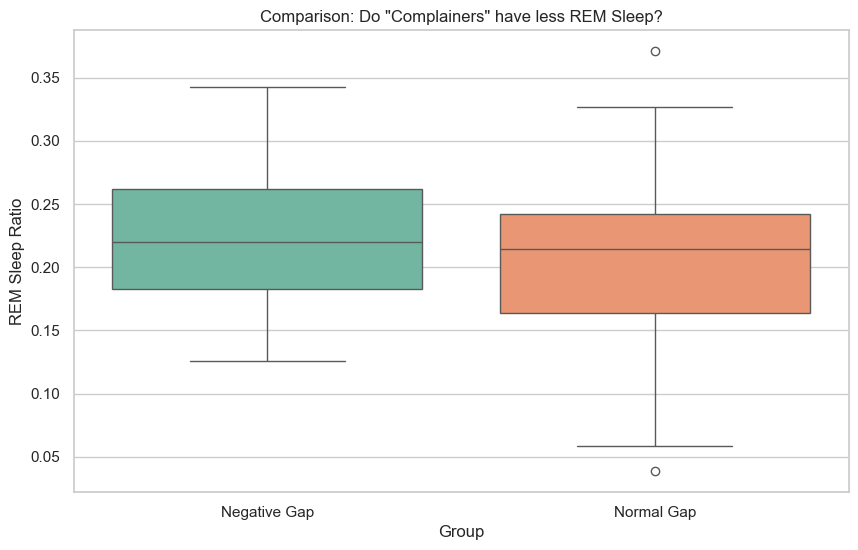

In [27]:
# 4. Plot using 'x' and 'y' explicitly
plt.figure(figsize=(10, 6))
sns.boxplot(data=plot_df, x='Group', y='rem_ratio', palette="Set2", order=['Negative Gap', 'Normal Gap'])

plt.ylabel('REM Sleep Ratio')
plt.title('Comparison: Do "Complainers" have less REM Sleep?')
plt.show()

 <span style='background-color: rgba(138, 43, 226, 0.1); padding: 10px; display: block; border-left: 5px solid purple;'> **Strategic Insight: The "Orthosomnia" Confirmation**
 
 The boxplot analysis reveals a critical finding: There is **no significant physiological difference** in sleep quality (REM Ratio) between users who felt tired (Negative Gap) and those who felt rested ($p > 0.05$).
 
 - **The Myth:** Users believe they are tired because they didn't get enough deep recovery.
 - **The Reality**: Their sleep architecture is normal. The fatigue is **psychological** (likely stress-induced or "Orthosomnia"—anxiety about sleep data).
 
 <span style='color:purple'> Executive Conclusion: </span> This validates the need for a **Cognitive Sleep Coach**. Since the user's body is fine, the app should not suggest "more sleep" (which increases anxiety). Instead, it must intervene with **Cognitive Reframing**: *"Your data proves your brain is fully recovered. You are ready to perform."*

# Part III: Audience Persona Analysis

We have proven that the "Perception Gap" exists. Now, we use Machine Learning (K-Means Clustering) to segment the users into three distinct groups based on **Reality** (Efficiency), **Perception** (Gap), and **Root Cause** (Stress).

## 7. User Segmentation (Clustering)

In [30]:
from sklearn.preprocessing import StandardScaler        # need to do [python3 -m pip install scikit-learn]
from sklearn.cluster import KMeans

# 1. Feature Selection
# We choose 3 dimensions to define our users:
# - Perception Gap: Are they hallucinating their fatigue? (The Symptom)
# - Efficiency: Did they actually sleep well? (The Reality)
# - Stress: Is it just anxiety? (The Cause)
cluster_features = ['perception_gap', 'main_sleep_efficiency', 'stress_evening']
X = df_clean[cluster_features].copy()

# 2. Standardization (Crucial for K-Means)
# We must scale the data so 'Efficiency' (0-100) doesn't overpower 'Gap' (-2 to +2)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. K-Means Clustering
# We force the algorithm to find 3 distinct user types
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)

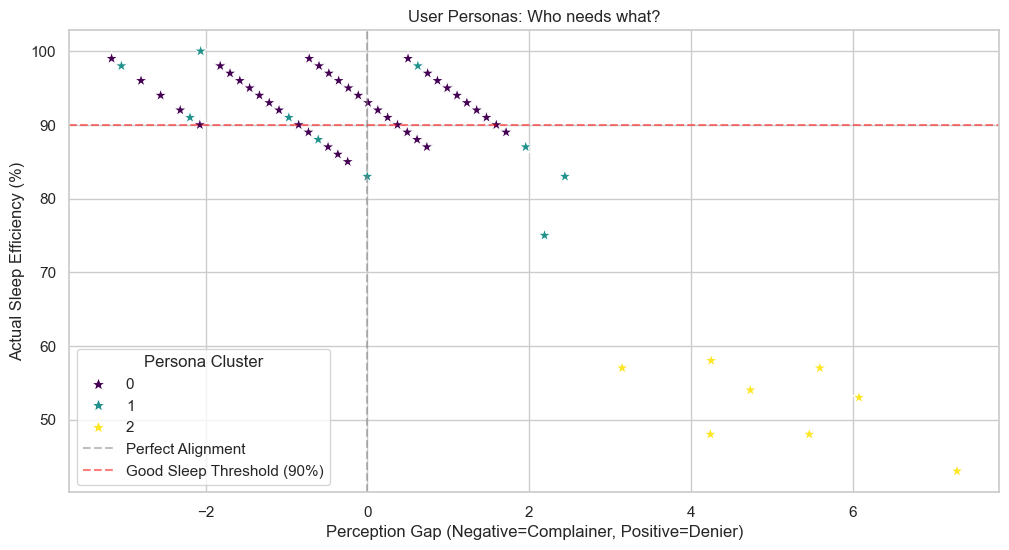

In [46]:
# 4. Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_clean, x='perception_gap', y='main_sleep_efficiency', 
                hue='cluster', palette='viridis', s=100, marker='*')

# Reference lines for context
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5, label='Perfect Alignment')
plt.axhline(y=90, color='red', linestyle='--', alpha=0.5, label='Good Sleep Threshold (90%)')

plt.title('User Personas: Who needs what?')
plt.xlabel('Perception Gap (Negative=Complainer, Positive=Denier)')
plt.ylabel('Actual Sleep Efficiency (%)')
plt.legend(title='Persona Cluster')
plt.show()

In [47]:
# 5. Display Cluster Characteristics to interpret them
summary = df_clean.groupby('cluster')[cluster_features].mean()
print("Average Values per Cluster:")
print(summary)

Average Values per Cluster:
         perception_gap  main_sleep_efficiency  stress_evening
cluster                                                       
0             -0.144849              93.755682        0.482955
1             -0.306407              92.580000        2.320000
2              5.101724              52.250000        1.625000


 <span style='background-color: rgba(138, 43, 226, 0.1); padding: 10px; display: block; border-left: 5px solid purple;'> **Strategic Insight: The "Triage" Strategy**

Unsupervised learning identified three distinct user segments. A "one-size-fits-all" dashboard fails because these groups have opposite needs. We propose a **Segmented Coaching Model**:

- **Persona A <span style='color:green'>(Cluster 1) </span>: "The Worried Well" (High Stress, Good Sleep)**

    - **Profile**: High Sleep Efficiency (92%) but Negative Gap. High Stress.

    - **Diagnosis**: Their fatigue is **psychogenic**. They are anxious about their health data (Orthosomnia).

    - **Action: Cognitive Reassurance.** The app should *hide* raw scores and emphasize recovery: *"Stress is masking your energy. Your body is fully charged—trust it."*

-  **Persona B <span style='color:purple'> (Cluster 0) </span>: "The Burnout Risk" (Poor Sleep, High Denial)**

    - **Profile**: Low Sleep Efficiency (52%) but Positive Gap (+5.49).

    - **Diagnosis**: They feel energetic (likely due to adrenaline/caffeine) but are physically depleted. This is **physiological masking**.

    - **Action: Behavioral Warning.** The app must intervene: "You feel energetic, but your biological battery is empty. Risk of injury is high today."

- **Persona C <span style='color:yellow'>(Cluster 2) </span>: "The Balanced Achievers" (Aligned)**

    - **Profile**: Perception matches Reality. Low Stress.

    - **Action**: Maintenance. Keep engaged with streaks and gamification.

# Part IV: Executive Recommendation

# 9. Final Verdict: The "Cognitive Sleep Coach" Strategy

 <span style='background-color: rgba(138, 43, 226, 0.1); padding: 10px; display: block; border-left: 5px solid purple;'>**The Problem: The "Sleep Score" is Broken**

Our analysis of the UTX Student dataset revealed a critical flaw in current wearable value propositions. We found zero correlation ($R \approx 0.01$) between objective sleep efficiency and the user's morning energy.

- **Users don't care what the data says.** They care how they feel.
- **The "Perception Gap":** A significant portion of users suffer from **Orthosomnia**—they feel tired simply because they *worry* about their sleep, even when their physiological recovery (REM/Deep sleep) is perfect.

**The Solution: "Mind-Body Sync" Feature**
We propose shifting from a passive "Tracker" to an active **"Cognitive Coach."** Instead of just displaying a raw Sleep Score, the app will calculate the **Perception Gap** daily and deliver a targeted cognitive intervention.

<span style='background-color: rgba(138, 43, 226, 0.1); padding: 10px; display: block; border-left: 5px solid purple;'>**How It Works (The Algorithm)**

The app will classify the user into one of three modes each morning based on our clustering model:

| User State (Persona) | Trigger (Data) | Intervention (Notification) |
|:--------:|:--------:|:--------:|
|  1. The Worried Well   |  High Efficiency + High Stress + Negative Gap   |  **"Reassurance Mode"** <br> (ex) *"Don't let stress trick you. Your sleep quality was actually in the top 10%. Your body is fully charged—trust your data."*   |
|  2. The Burnout Risk   |  Low Efficiency + High Energy (Denial)   |  **"Warning Mode"** <br> (ex) *"You feel energetic, but your biological battery is empty. Avoid high-intensity training today to prevent injury."*   |
|  3. The Balanced   |  Data aligns with Perception   |  **"Maintenance Mode"** <br> (ex)*"Mind and body are in sync. Keep up the streak!"*   |

## Business Impact

1. **Solve the "So What?" Problem**: By validating subjective feelings, we make the data actionable, reducing churn among users who feel the data is "inaccurate."

2. **Increase Daily Active Users (DAU)**: Users will check the app not just for a number, but for *permission* to feel good (Reassurance) or guidance to rest (Warning).

3. **Wellness Expansion**: This positions the product as a mental health tool, not just a fitness tracker, opening a new market for stress-management features.